# (online food delivery platform Exploration)
## by (Sarah Oftadeh)

## Investigation Aspects

- main channel of revenue among all vendor types
- the difference of customer behaviour 
- order trend during different hours in a day for the most ordered vendor type
- failure/success of ordered of the most favorite vendortype and during different times in a day as well as the relationship of expected delivery time in determining the status. 
- Delivery/pickup preference in determining the fail/success of orders.


## Dataset Overview

> There is about 1m food orders for an online application, operating in 14 different cities in Malaysia, the payment was done either CoD or online, devices used to place orders were mobile, tablet and desktop. the status of orders (if the order was successful or failed). the voucher usage indicates whether they used voucher to make the purchase or not. Data for customer preferrence over delivery or pickup has also been gathered.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('fooddata.csv')
df.head()

,order_id,payment_type,city,zone,vendor_type,delivery_pickup,total_vendor_orders,total_amount,is_first_order,is_failed_order,is_voucher_used,expected_delivery_in_minutes,device,order_time
0,175893311,Online Banking,Terengganu,Chukai,restaurants,delivery,192.0,23.17,False,False,False,62,mobile,2021-03-05 20:27:10 UTC
1,175893309,Online Banking,Kedah,Sungai petani,restaurants,delivery,147.0,30.11,False,False,False,60,mobile,2021-03-05 20:27:10 UTC
2,175893304,Online Banking,Klang valley,Ampang,restaurants,delivery,2654.0,39.50,False,False,False,42,mobile,2021-03-05 20:27:10 UTC
3,175893308,Online Banking,NaN,NaN,restaurants,delivery,752.0,131.98,False,False,False,30,mobile,2021-03-05 20:27:10 UTC
4,175893305,Online Banking,Klang valley,Tanjung karang halal,restaurants,delivery,2701.0,16.99,False,False,False,20,mobile,2021-03-05 20:27:10 UTC


In [3]:
# Renameing misleading column names, changing order_time  data type, adding hour column, extracting from order_time
df.rename(columns={"total_vendor_orders": "vendor_daily_order_number"}, inplace=True)
df['order_time'] = pd.to_datetime(df['order_time'])
df['order_hour'] = df.order_time.dt.hour

## Vendor Type Distribution
about 95% of customers placed orders from restaurants

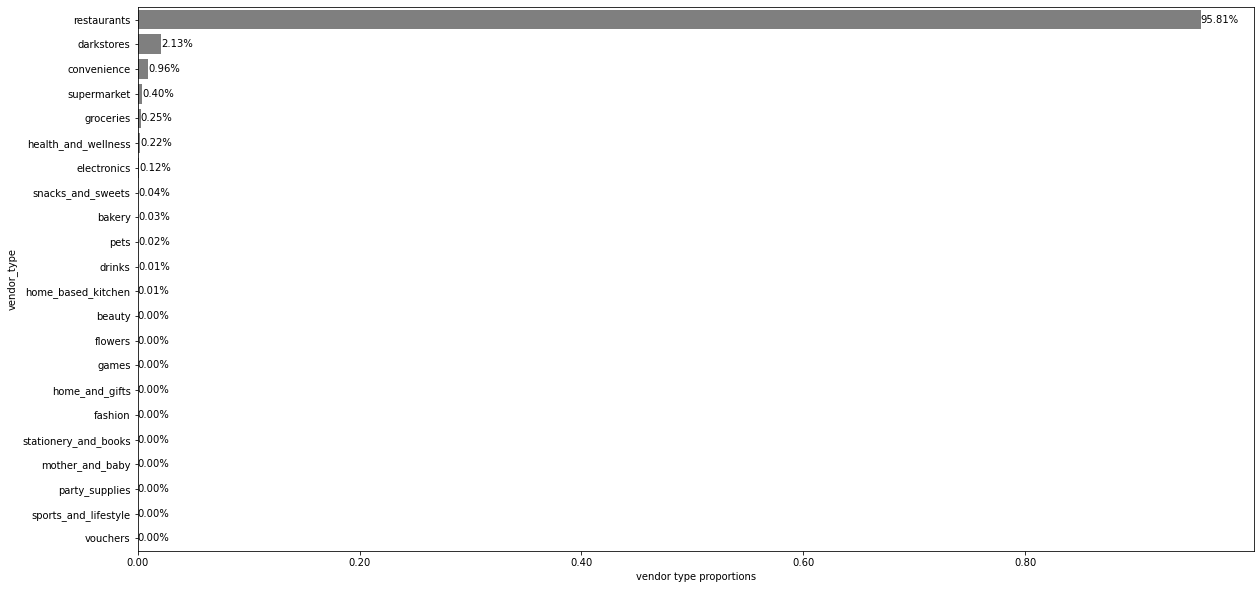

In [4]:
vendor_count = df.vendor_type.value_counts()
n_df = df.shape[0]
max_vendor_count = vendor_count[0]
max_prop = max_vendor_count / n_df
tick_props = np.arange (0, max_prop, 0.2)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
vendor_order = df['vendor_type'].value_counts().index
plt.figure(figsize = [20,10])
color = sb.color_palette()[7]
sb.countplot (data=df, y= 'vendor_type' , order = vendor_order, color = color)
plt.xticks (tick_props * n_df, tick_names)
plt.xlabel('vendor type proportions')
#adding its relative frequncy percentage to ech bar
for i in range(vendor_count.shape[0]):
    count = vendor_count[i]
    pct_string = '{:0.2f}%'.format(100*count/n_df)
    plt.text(count+1, i, pct_string, va = 'center');

Note:  Since about 96% of orders were generated through restaurans followed by 2% Darkstores and 1% the other stores, vendor types are devided into three main/top channels: restaurants and darkstores  and all the others being categorised as "shops".

## Customer Behaviour
### Restaurants : 
- in restaurants 96% of orders were successful with 4% failed rate, like dark stores only 3% of orders were made by first time shoppers, mobile is the only device used for this category.

- in terms of payment onine banking, cash on delivery stands in the first place followed by online banking and online card payment.

- most majority of users were organic with rate of 83%.
- 97% of orders where delivered by company delivery service and only 3% preferred to pickup their orders themselves.

### Darkstores:

- in Darkstores 99% of orders were successful, only 4% of orders were made by first time shoppers, 99% of them used their mobile phone.

- In terms of payment onine banking, cash on delivery and card payment all had close rates with Online banking being on top.

- 61% of purchases were made through organic customers who didnt use any vouchers to complete their orders.

- 100% of orders were delivered to the customers

### Shops:

- in shops 90% of orders were successful, like dark stores only 4% of orders were made by first time shoppers, mobile is the solo dominant device for its users.

- In terms of payment onine banking, like darkstores but with higher rate cash on delivery stands in the first place followed by online banking and online card payment. 

- 74% of purchases were made through organic customers who didnt use any vouchers to complete their orders.

- only 2% of customers picked up their orders and the rest had them delivered.



In [5]:
# creating different table names for three categories
df_rest = df[df['vendor_type'] == 'restaurants']
df_dark = df[df['vendor_type'] == 'darkstores']
df_shops = df[(df['vendor_type'] != 'darkstores') & (df['vendor_type'] != 'restaurants')]


In Restaurants:


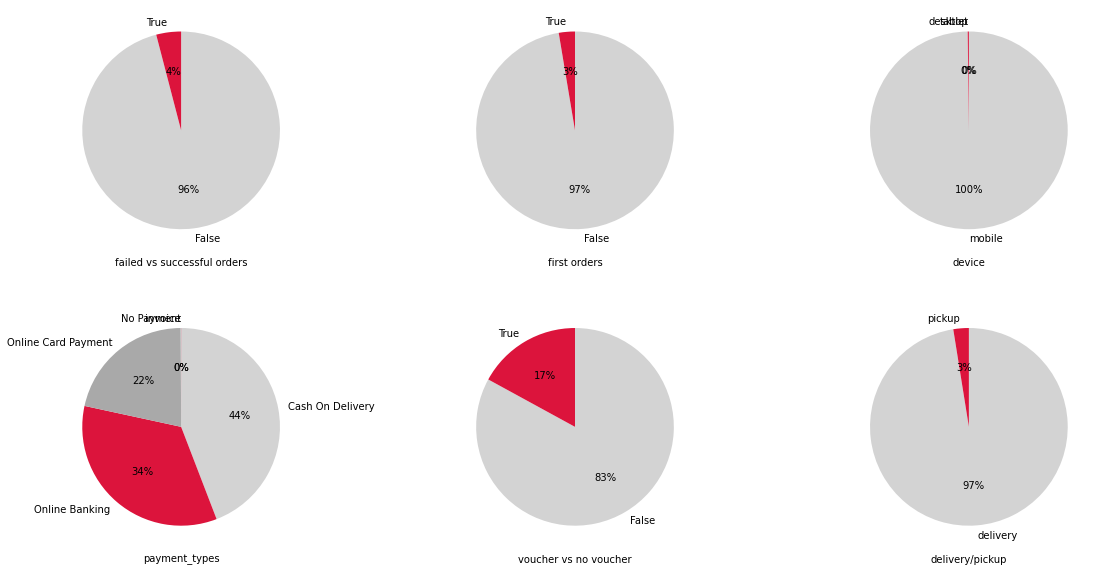

In [6]:
# in restaurants:

print('In Restaurants:')
plt.figure(figsize = [20,10])
colors = ["lightgray", "crimson", "darkgray"]

plt.subplot (2, 3, 1)
failed_order = df_rest.is_failed_order.value_counts()
plt.pie(failed_order, labels = failed_order.index, startangle = 90, counterclock =False, colors = colors, autopct='%1.f%%');
plt.xlabel('failed vs successful orders')



plt.subplot(2,3,2)
first_order = df_rest.is_first_order.value_counts()
plt.pie(first_order, labels = failed_order.index, startangle = 90, counterclock =False, colors = colors, autopct='%1.f%%');
plt.xlabel('first orders');


plt.subplot(2,3,3)
device = df_rest.device.value_counts()
plt.pie(device, labels = device.index, startangle = 90, counterclock =False, colors = colors, autopct='%1.f%%');
plt.xlabel('device')


plt.subplot(2,3,4)
payment_type = df_rest.payment_type.value_counts()
plt.pie(payment_type, labels = payment_type.index, startangle = 90, counterclock =False, colors = colors, autopct='%1.f%%');
plt.xlabel('payment_types')


plt.subplot(2,3,5)
voucher = df_rest.is_voucher_used.value_counts()
plt.pie(voucher, labels = voucher.index, startangle = 90, counterclock =False, colors = colors, autopct='%1.f%%');
plt.xlabel('voucher vs no voucher');

plt.subplot(2,3,6)
delivery_status = df_rest.delivery_pickup.value_counts()
plt.pie(delivery_status, labels = delivery_status.index, startangle = 90, counterclock =False, colors = colors, autopct='%1.f%%');
plt.xlabel('delivery/pickup');


In Darkstores:


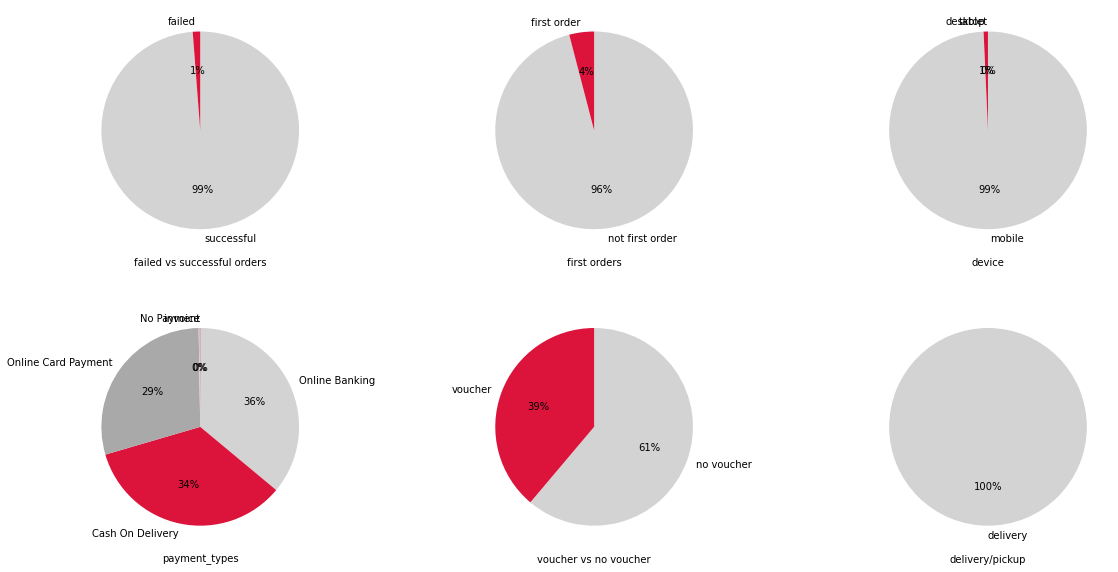

In [7]:
# the same thing for darkstores
print('In Darkstores:')
plt.figure(figsize = [20,10])
colors = ["lightgray", "crimson", "darkgray"]

plt.subplot (2, 3, 1)
failed_order = df_dark.is_failed_order.value_counts()
plt.pie(failed_order, labels = ['successful', 'failed'], startangle = 90, counterclock =False, colors = colors, autopct='%1.f%%');
plt.xlabel('failed vs successful orders')



plt.subplot(2,3,2)
first_order = df_dark.is_first_order.value_counts()
plt.pie(first_order, labels = ['not first order', 'first order'], startangle = 90, counterclock =False, colors = colors, autopct='%1.f%%');
plt.xlabel('first orders');


plt.subplot(2,3,3)
device = df_dark.device.value_counts()
plt.pie(device, labels = device.index, startangle = 90, counterclock =False, colors = colors, autopct='%1.f%%');
plt.xlabel('device')


plt.subplot(2,3,4)
payment_type = df_dark.payment_type.value_counts()
plt.pie(payment_type, labels = payment_type.index, startangle = 90, counterclock =False, colors = colors, autopct='%1.f%%');
plt.xlabel('payment_types')


plt.subplot(2,3,5)
voucher = df_dark.is_voucher_used.value_counts()
plt.pie(voucher, labels = ['no voucher', 'voucher'], startangle = 90, counterclock =False, colors = colors, autopct='%1.f%%');
plt.xlabel('voucher vs no voucher')

plt.subplot(2,3,6)
delivery_status = df_dark.delivery_pickup.value_counts()
plt.pie(delivery_status, labels = delivery_status.index, startangle = 90, counterclock =False, colors = colors, autopct='%1.f%%');
plt.xlabel('delivery/pickup');


In Shops:


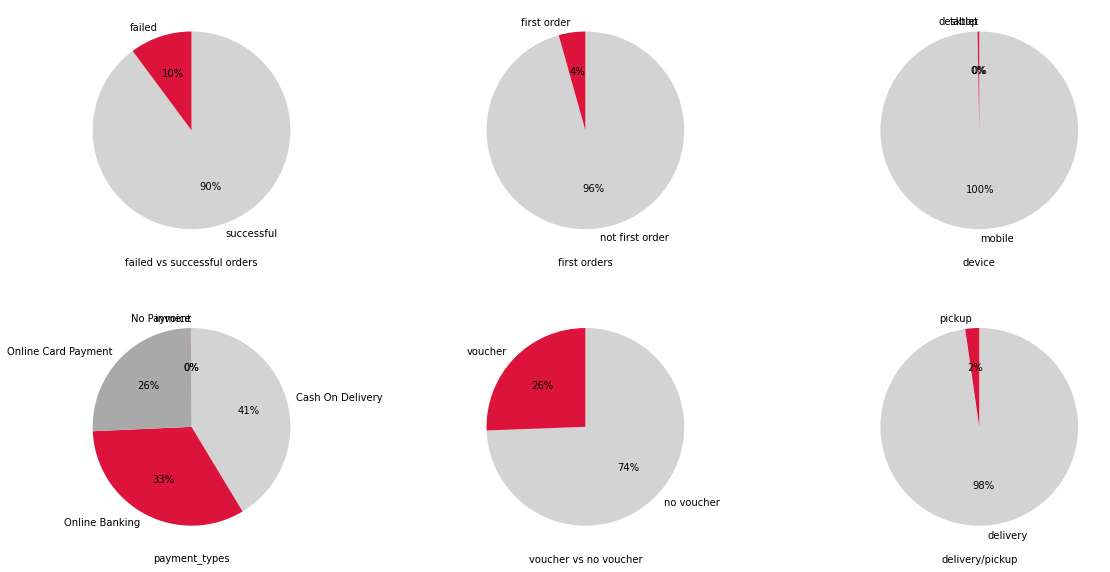

In [8]:
# I will plot that in shops:
print('In Shops:')
plt.figure(figsize = [20,10])
colors = ["lightgray", "crimson", "darkgray"]

plt.subplot (2, 3, 1)
failed_order = df_shops.is_failed_order.value_counts()
plt.pie(failed_order, labels = ['successful', 'failed'], startangle = 90, counterclock =False, colors = colors, autopct='%1.f%%');
plt.xlabel('failed vs successful orders')



plt.subplot(2,3,2)
first_order = df_shops.is_first_order.value_counts()
plt.pie(first_order, labels = ['not first order', 'first order'], startangle = 90, counterclock =False, colors = colors, autopct='%1.f%%');
plt.xlabel('first orders');


plt.subplot(2,3,3)
device = df_shops.device.value_counts()
plt.pie(device, labels = device.index, startangle = 90, counterclock =False, colors = colors, autopct='%1.f%%');
plt.xlabel('device')



plt.subplot(2,3,4)
payment_type = df_shops.payment_type.value_counts()
plt.pie(payment_type, labels = payment_type.index, startangle = 90, counterclock =False, colors = colors, autopct='%1.f%%');
plt.xlabel('payment_types')


plt.subplot(2,3,5)
voucher = df_shops.is_voucher_used.value_counts()
plt.pie(voucher, labels = ['no voucher', 'voucher'], startangle = 90, counterclock =False, colors = colors, autopct='%1.f%%');
plt.xlabel('voucher vs no voucher')

plt.subplot(2,3,6)
delivery_status = df_shops.delivery_pickup.value_counts()
plt.pie(delivery_status, labels = delivery_status.index, startangle = 90, counterclock =False, colors = colors, autopct='%1.f%%');
plt.xlabel('delivery/pickup');

## Order Distribution in different cities for three vendor categories:

top 4 cities with most number of orders are the same among all three categories. 

cities are: Klang Valley, Johor, Penang, Perak

In Restaurants :


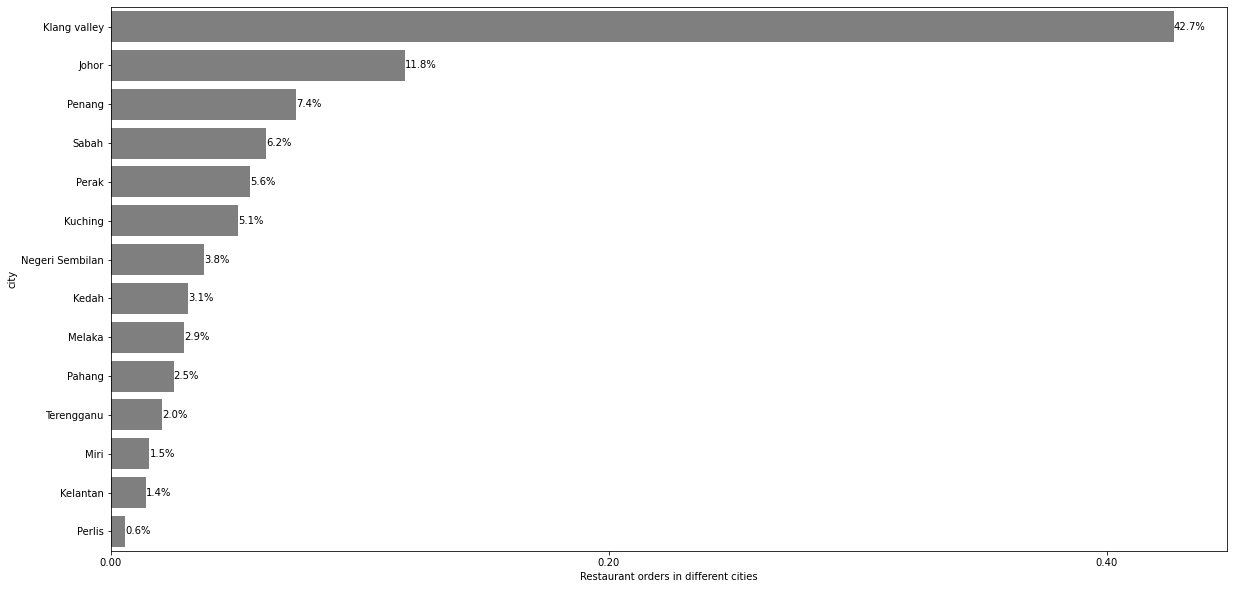

In [9]:
# restaurants:
print('In Restaurants :')
city_count_rest = df_rest.city.value_counts()
n_df = df_rest.shape[0]
max_city_count_rest = city_count_rest[0]
max_prop = max_city_count_rest / n_df


tick_props = np.arange (0, max_prop, 0.2)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
city_order_rest = df_rest['city'].value_counts().index

plt.figure(figsize = [20,10])
color = sb.color_palette()[7]
sb.countplot (data=df_rest, y= 'city' , order = city_order_rest, color = color)
plt.xticks (tick_props * n_df, tick_names)
plt.xlabel('Restaurant orders in different cities')
#adding its relative frequncy percentage to ech bar
for i in range(city_count_rest.shape[0]):
    count = city_count_rest[i]
    pct_string = '{:0.1f}%'.format(100*count/n_df)
    plt.text(count+1, i, pct_string, va = 'center');


In Darkstores :


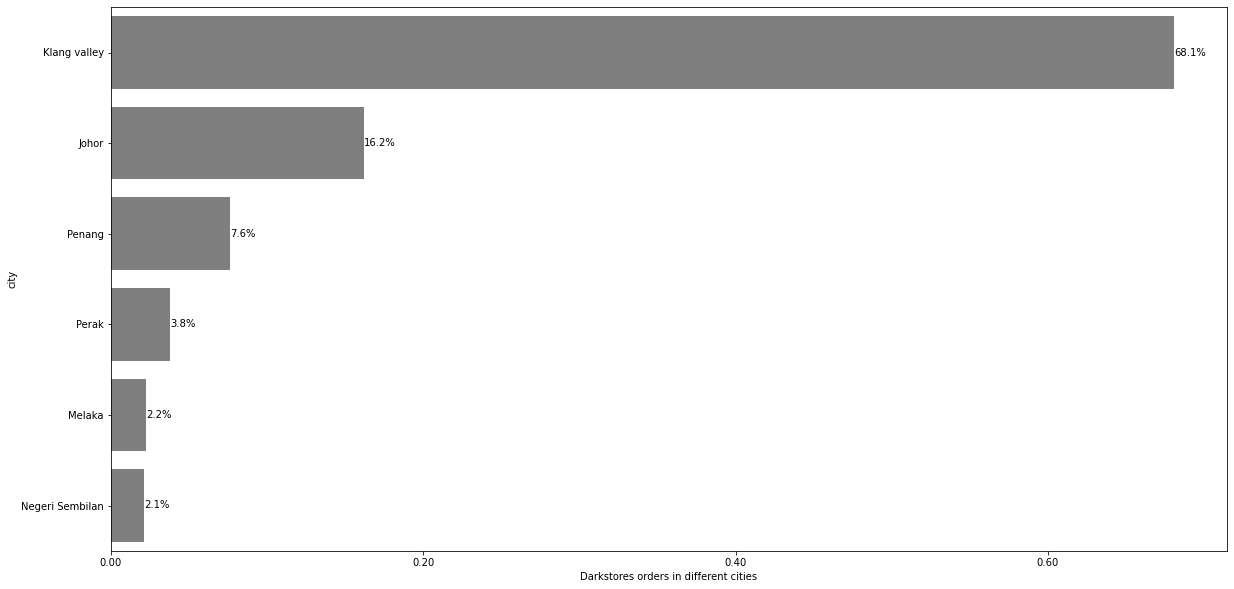

In [10]:
#darkstores:
print('In Darkstores :')
city_count_dark = df_dark.city.value_counts()
n_df = df_dark.shape[0]
max_city_count_dark = city_count_dark[0]
max_prop = max_city_count_dark/ n_df


tick_props = np.arange (0, max_prop, 0.2)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
city_order_dark = df_dark['city'].value_counts().index

plt.figure(figsize = [20,10])
color = sb.color_palette()[7]
sb.countplot (data=df_dark, y= 'city' , order = city_order_dark, color = color)
plt.xticks (tick_props * n_df, tick_names)
plt.xlabel('Darkstores orders in different cities')
#adding its relative frequncy percentage to ech bar
for i in range(city_count_dark.shape[0]):
    count = city_count_dark[i]
    pct_string = '{:0.1f}%'.format(100*count/n_df)
    plt.text(count+1, i, pct_string, va = 'center');

In Shops :


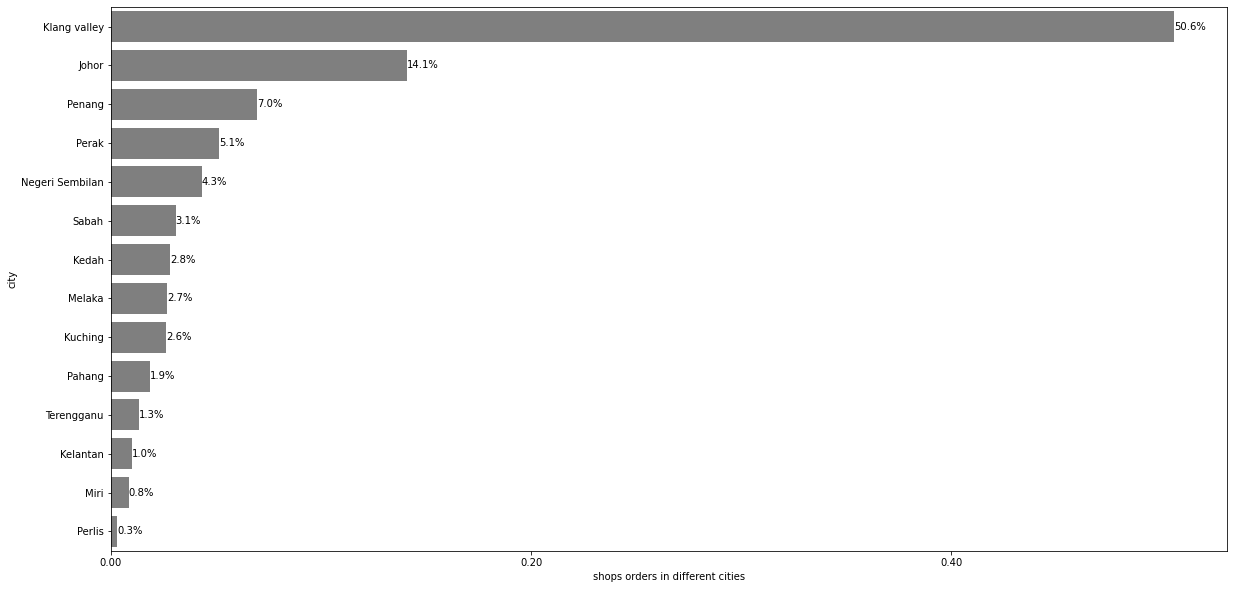

In [11]:
# Shops:
print ( 'In Shops :')
city_count_shops = df_shops.city.value_counts()
n_df = df_shops.shape[0]
max_city_count_shops = city_count_shops[0]
max_prop = max_city_count_shops/ n_df


tick_props = np.arange (0, max_prop, 0.2)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
city_order_shops = df_shops['city'].value_counts().index

plt.figure(figsize = [20,10])
color = sb.color_palette()[7]
sb.countplot (data=df_shops, y= 'city' , order = city_order_shops, color = color)
plt.xticks (tick_props * n_df, tick_names)
plt.xlabel('shops orders in different cities')
#adding its relative frequncy percentage to ech bar
for i in range(city_count_shops.shape[0]):
    count = city_count_shops[i]
    pct_string = '{:0.1f}%'.format(100*count/n_df)
    plt.text(count+1, i, pct_string, va = 'center');

## Hours with most number of orders in each vendor category:
top order hour for restaurants and shops is lunch time at 1PM, however users prefer to make orders from darkstores at night time around 8pm.

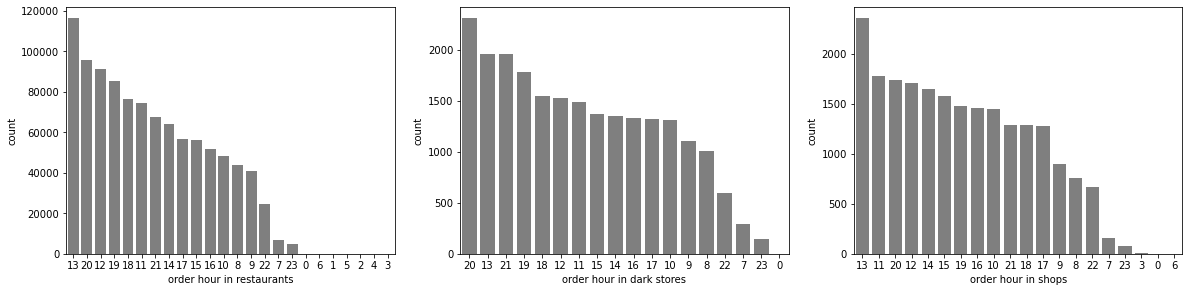

In [12]:

plt.figure(figsize = [20,10])

plt.subplot (2, 3, 1)
color = sb.color_palette()[7]
hour_count = df_rest['order_hour'].value_counts().index
sb.countplot (data=df_rest, x= 'order_hour' , order = hour_count, color = color)
plt.xlabel('order hour in restaurants')


plt.subplot (2, 3, 2)
color = sb.color_palette()[7]
hour_count = df_dark['order_hour'].value_counts().index
sb.countplot (data=df_dark, x= 'order_hour' , order = hour_count, color = color)
plt.xlabel('order hour in dark stores')


plt.subplot (2, 3, 3)
color = sb.color_palette()[7]
hour_count = df_shops['order_hour'].value_counts().index
sb.countplot (data=df_shops, x= 'order_hour' , order = hour_count, color = color)
plt.xlabel('order hour in shops');

## Money generated in each vendor category:
- It is fair to assume that the average amount of money generted per order is less in restaurants, around 20 RM with compared with shops and dark stores which is around 30 RM. However, the distribution is narrower and closer to normal distribution in restaurant implying the less standard deviation in resturants.

- Dark stores however, show 3 peak points (first 40 RM and 10 and 20 being next two peaks).

- in shops there is a harsh surge to the peak whils in restaurant the transition to peak is smoother.

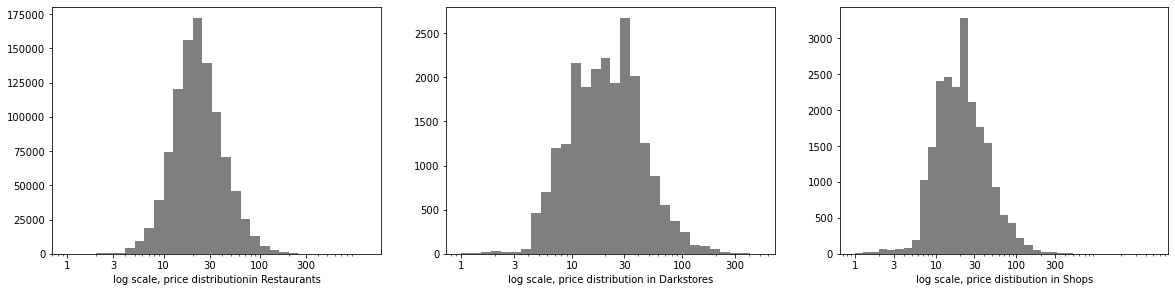

In [13]:
plt.figure(figsize = [20,10])

plt.subplot (2, 3, 1)
color = sb.color_palette()[7]
bins = 10** np.arange (0, 3.05+0.1, 0.1)
ticks = [ 1, 3, 10, 30, 100, 300]
labels = [ '{}'.format(v) for v in ticks]
plt.hist(data= df_rest, x = 'total_amount', bins=bins, color = color);
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlabel('log scale, price distributionin Restaurants')

plt.subplot (2, 3, 2)
bins = 10** np.arange (0, 2.7+0.09, 0.09)
ticks = [ 1, 3, 10, 30, 100, 300]
labels = [ '{}'.format(v) for v in ticks]
plt.hist(data= df_dark, x = 'total_amount', bins=bins, color= color);
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlabel('log scale, price distribution in Darkstores')

plt.subplot (2, 3, 3)
#Log Scaling: 
color = sb.color_palette()[7]
bins = 10** np.arange (0, 3.64+0.1, 0.1)
ticks = [ 1, 3, 10, 30, 100, 300]
labels = [ '{}'.format(v) for v in ticks]
plt.hist(data= df_shops, x = 'total_amount', bins=bins, color= color);
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlabel('log scale, price distibution in Shops');



## Expected delivery time in each vendor category:

- the trend is right skewed in all three graphs with three peak points in restaurants indicaitng 20, 27 and 32 minutes in delivery time.

- in darkstores expected delivery time reaches to peaks of 19 and 30 minutes but the highest point is about 25 minutes.

- Shops represent more outliers in delivery time and the peak is about 30 minutes. Overall expected delivery time is highest in shops.


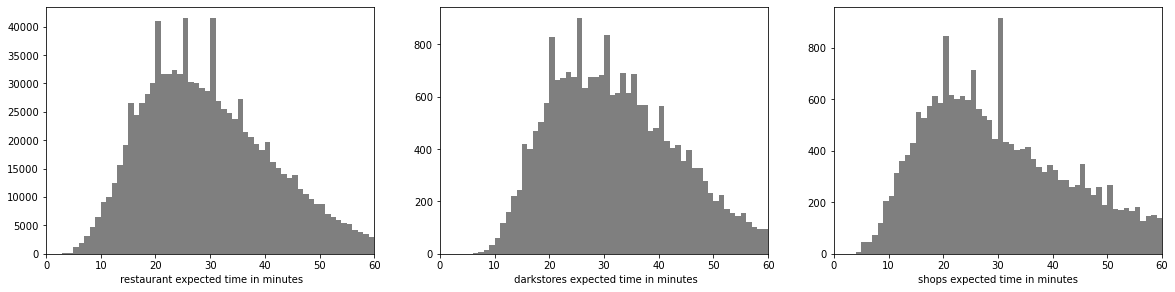

In [14]:
plt.figure(figsize = [20,10])
color = sb.color_palette()[7]


plt.subplot (2, 3, 1)
bins = np.arange (0, df_rest['expected_delivery_in_minutes'].max()+1, 1)
plt.hist(data= df_rest, x = 'expected_delivery_in_minutes', bins=bins, color= color);
plt.xlim(0, 60)
plt.xlabel(' restaurant expected time in minutes')




plt.subplot (2, 3, 2)
bins = np.arange (0, df_dark['expected_delivery_in_minutes'].max()+1, 1)
plt.hist(data= df_dark, x = 'expected_delivery_in_minutes', bins=bins, color= color);
plt.xlim(0, 60)
plt.xlabel(' darkstores expected time in minutes')



plt.subplot (2, 3, 3)
bins = np.arange (0, df_shops['expected_delivery_in_minutes'].max()+1, 1)
plt.hist(data= df_shops, x = 'expected_delivery_in_minutes', bins=bins, color= color);
plt.xlim(0, 60)
plt.xlabel('shops expected time in minutes');

# Some Insight in Restaurants

## Money generated vs. hour of order 
- in restaurants numbers of orders peaked at lunch time (13pm), followed by a downward trend until dinner time which again goes to its highest point around 8 and plummeted right after.
- The total money generated followes the same trend, however the amount per order during lunch time suggest the presence of an outlier, generating 1000 RM.

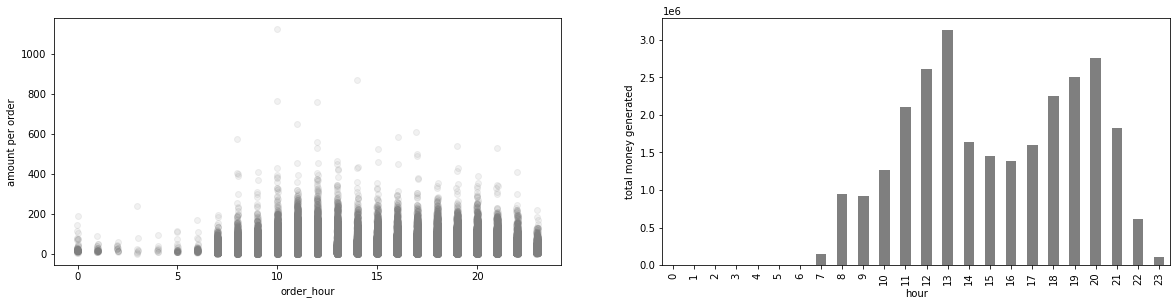

In [15]:
plt.figure(figsize = [20,10])

plt.subplot (2, 2, 1)

sb.regplot(data = df_rest, x = 'order_hour', y = 'total_amount', x_jitter = 0.04, scatter_kws = {'alpha' : 1/10}, fit_reg = False, color= color);
plt.xlabel('order_hour')
plt.ylabel('amount per order')

plt.subplot (2, 2, 2)

hour_total = df_rest.groupby('order_hour').total_amount.sum()
hour_total.plot.bar(color= color)
plt.xlabel('hour')
plt.ylabel('total money generated');

### Expected delivery time and the hour of order
- the most deliveries are taking place during lunch and about 25 minutes wait. As we move toward dinner time there is few orders with less that 10 minutes although we have faster deliveries in lunch time.

In [16]:
# there seems to be one point with abnormal value, lets drop that one point.
df_rest.drop(df_rest[df_rest['expected_delivery_in_minutes']== 22132.0].index, inplace=True)

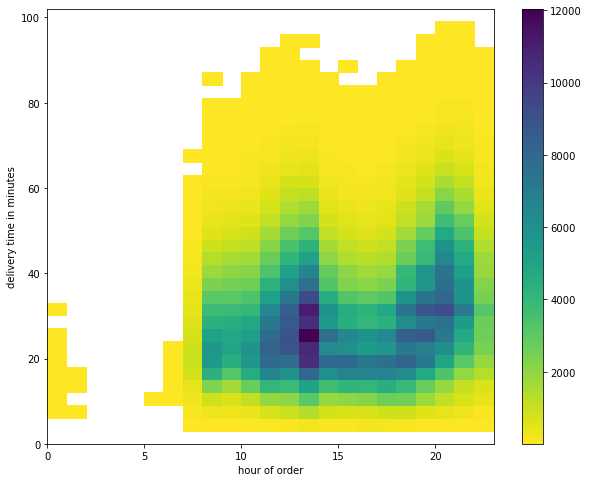

In [17]:
plt.figure(figsize = [10,8])
bin_x = np.arange(0, 23+1, 1)
bin_y = np.arange (0, 100+3, 3)
plt.hist2d(data = df_rest, x= 'order_hour', y = 'expected_delivery_in_minutes', cmin= 5, cmap = 'viridis_r', bins = [bin_x, bin_y]);
plt.colorbar()
plt.xlabel('hour of order')
plt.ylabel('delivery time in minutes');

Note: Time of the dy are categoried into 6 groups:
- after_midnight
- early_breakfast
- brunch
- lunch
- evening_snack
- dinner

In [18]:
bins = np.arange(0, 28, 4)
# categories are labled like this
bins_names = ['after_midnight', 'early_breakfast', 'brunch', 'lunch', 'evening_snack', 'dinner']
df_rest['time_segment'] = pd.cut(df['order_hour'], bins,  labels=bins_names, right=False)

In [19]:
# this is a finction that generates distibution of failed/successful orders in unit % across all categories:
def with_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
    plt.show()

def without_hue(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Failed/Successful and delivery time per group:
- the most number of successful orders falls in lunch time where the number of orders surges, with low fail rate, however the second most failed orders occurs in the second highest time in demand for delivery. 

- the average delivery time during each group increases as we move on further during a day, the alarming part is in "dinner" time, since it is account for the highest demands in orders but both high delivery time and hight fail rate indicate that, fail rates could be due to high expected time. 

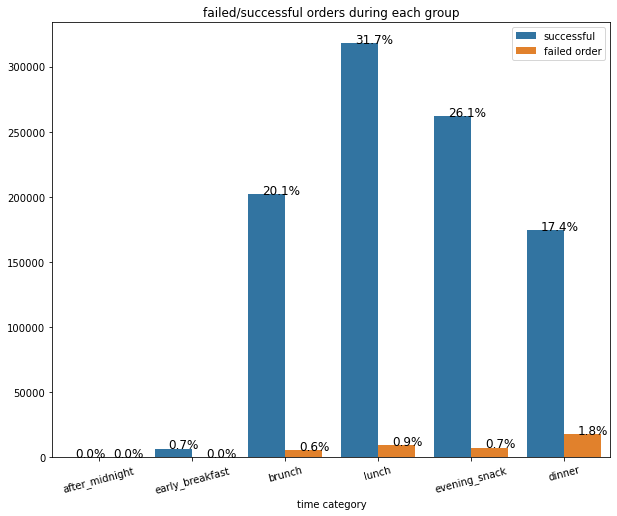

In [20]:
plt.figure(figsize = [10, 8])


ax = sb.countplot(data = df_rest, x = 'time_segment', hue = 'is_failed_order', dodge = True)
ax.set_title('failed/successful orders during each group')
ax.set(xlabel = 'time category', ylabel ='')
ax.legend( ['successful','failed order']);
plt.xticks(rotation =15);



without_hue(ax, df_rest.time_segment)

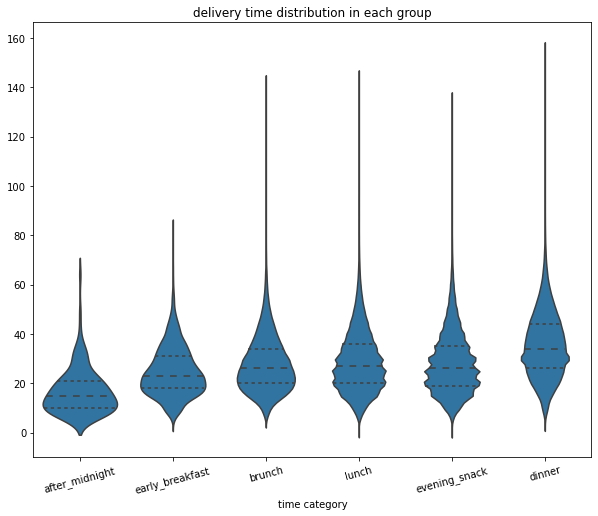

In [21]:
# take a look at distibution of delivery time in each category:
plt.figure(figsize = [10, 8])
base_color = sb.color_palette()[0]
ax = sb.violinplot(data = df_rest, x ='time_segment', y = 'expected_delivery_in_minutes', color = base_color, inner = 'quartile')
ax.set_title('delivery time distribution in each group')
ax.set(xlabel = 'time category', ylabel = '')
plt.xticks( rotation =15);

## Hour of order vs expected delivery time vs order status
- failed orders increase during dinner time, however highest demand in orders lies within lunch time and decrease in during dinner.

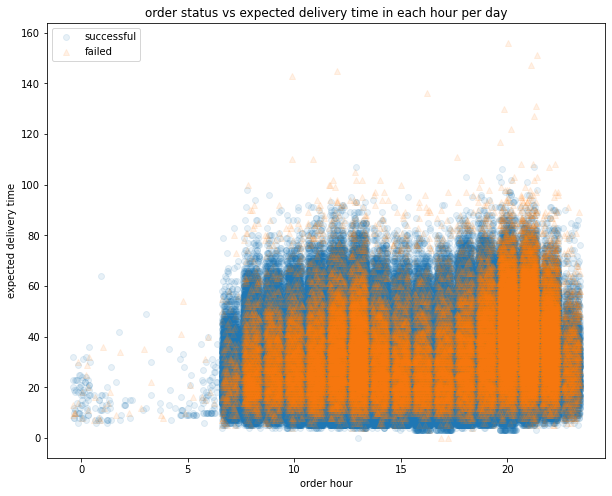

In [22]:
plt.figure(figsize = [10, 8])

ttype_markers = [[False, 'o'],
                 [True, '^']]
for ttype, marker in ttype_markers:
    plot_data =df_rest.loc[df_rest['is_failed_order'] == ttype]
    sb.regplot(data =plot_data, x = 'order_hour' , y = 'expected_delivery_in_minutes', x_jitter = 0.4 , fit_reg = False, scatter_kws={'alpha':0.1}, marker =marker)                       

    
plt.xlabel ('order hour')
plt.ylabel('expected delivery time')
plt.legend (['successful', 'failed'])
plt.title('order status vs expected delivery time in each hour per day');

## delivery/pickup time vs status of orders
- Pick up time is drastically less than delivery, however they follow the same trend from lucnh to dinner.

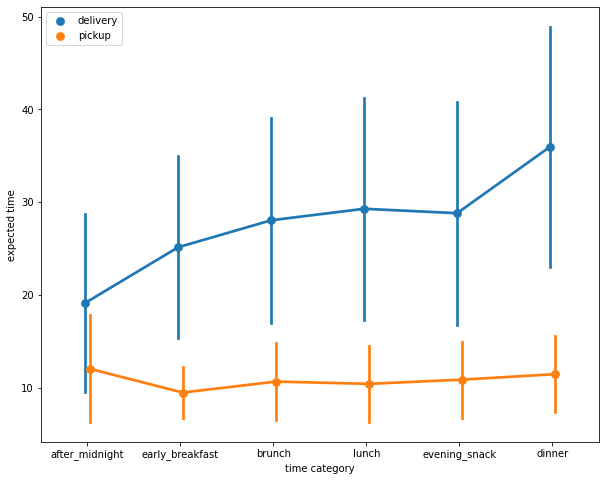

In [23]:
plt.figure(figsize = [10, 8])
sb.pointplot( data = df_rest, x ='time_segment', y = 'expected_delivery_in_minutes', hue = 'delivery_pickup',
            ci = 'sd', linestyle = "", dodge = True)
plt.xlabel ('time category')
plt.ylabel('expected time')
plt.legend ();

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!